
# Image correlation basics

Here we synthetically apply a rigid-body transformation to an image
and try to measure this transformation using the ``register`` image correlation
function.


## Import modules



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import spam.deformation
import spam.DIC
import spam.datasets

## Load snow data and create a deformed image

Here we will load the data,
define a deformation function and apply it to the data
in order to obtain a deformed data set.

We will then visualise the difference between the images
-- as explained in the `imageCorrelationTheory`.

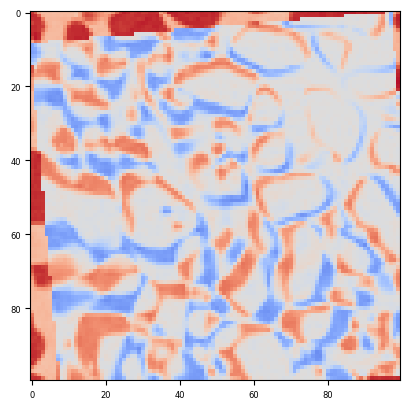

In [2]:
# Load data
snow = spam.datasets.loadSnow()

# Define transformation to apply
transformation = {'t': [0.0, 3.0, 2.5],
                  'r': [5.0, 0.0, 0.0]}

# Convert this into a deformation function
Phi = spam.deformation.computePhi(transformation)

# Apply this to snow data
snowDeformed = spam.DIC.applyPhi(snow, Phi=Phi)

# Show the difference between the initial and the deformed image.
# Here we used the blue-white-red colourmap "coolwarm" 
# which makes 0 white on the condition of the colourmap being symmetric around zero, 
# so we force the values with vmin and vmax.
plt.figure()
plt.imshow((snow - snowDeformed)[50], cmap='coolwarm', vmin=-36000, vmax=36000)

## Perform correlation

Start correlation with Error = 4675.78


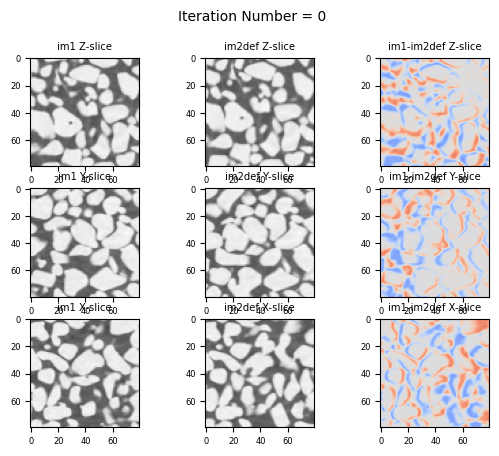

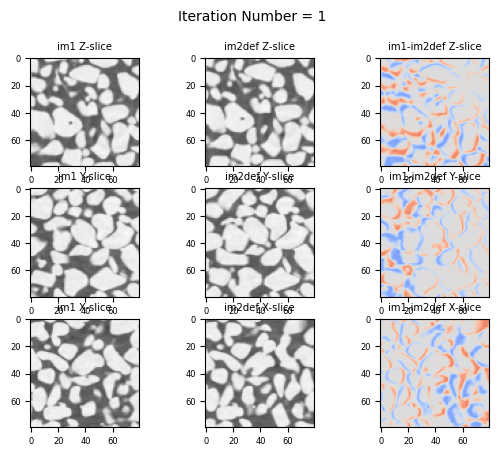

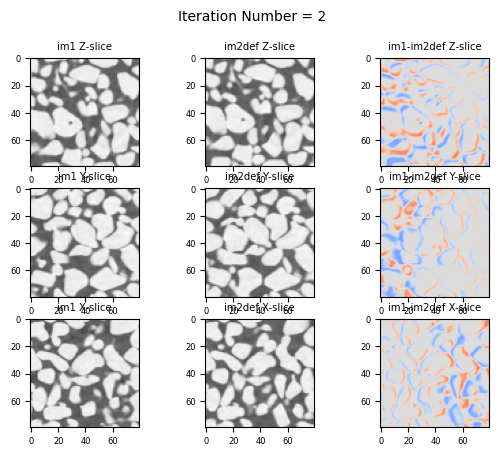

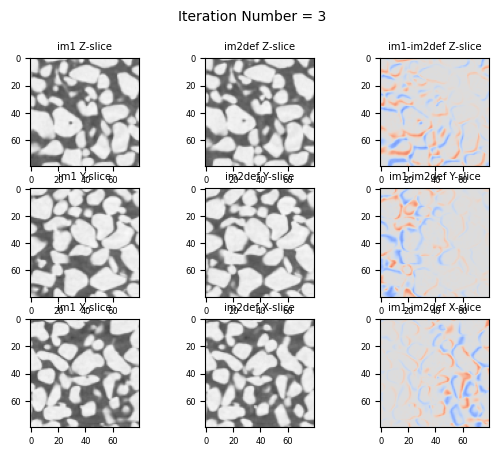

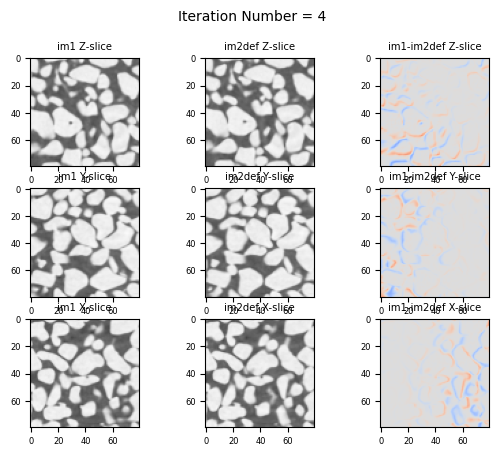

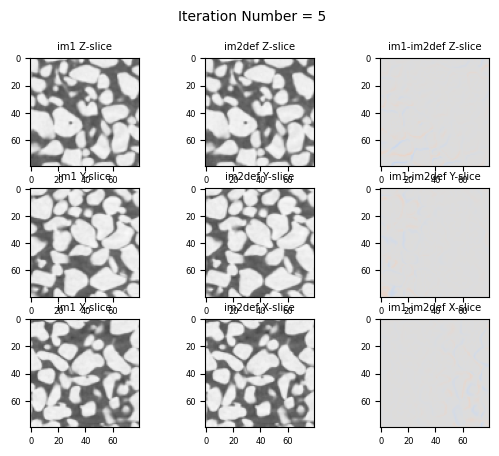

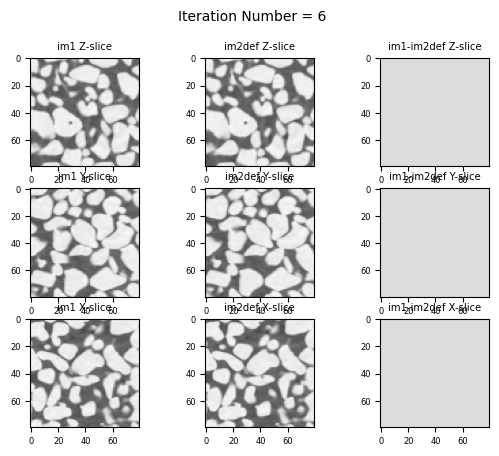

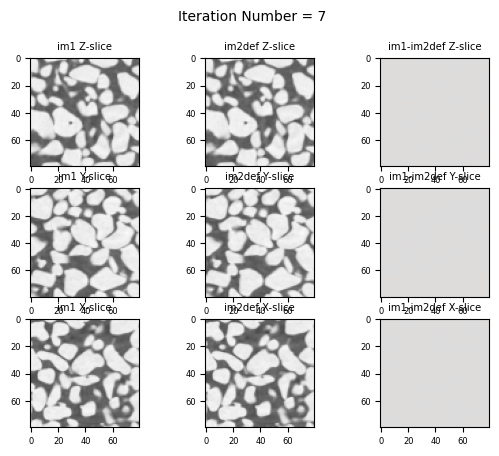

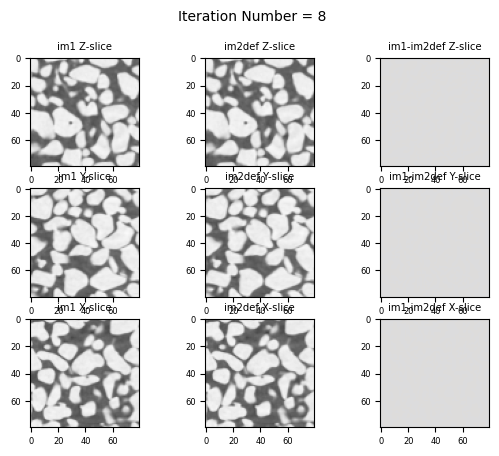

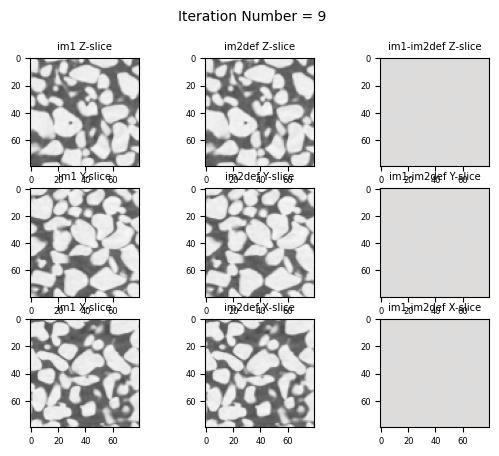


	 -> Converged


In [3]:
# Now we will use the image correlation function to try
# to measure the Phi between `snow` and `snowDeformed`.
spam.DIC.register(snowDeformed, snow,
                  margin=10,
                  maxIterations=50,
                  deltaPhiMin=0.001,
                  verbose=True,                 # Show updates on every iteration
                  imShowProgress=True,           # Show horizontal slice
                  imShowProgressNewFig=True)    # New figure at every iteration

plt.show()